Após gerar o arquivo via Etapa1.cpp, basta colocar o arquivo estatisticas.json junto a pasta desse arquivo .ipynb

=== Estatísticas do Grafo ===
numVertices: 69
numArestas: 6
numArcos: 229
numVerticesRequeridos: 65
numArestasRequeridas: 6
numArcosRequeridos: 11
densidade: 0.051364
componentes: 1
grauMin: 3
grauMax: 12
caminhoMedio: 123.461
diametro: 301
intermediacao: [8, 37, 52, 132, 285, 272, 113, 32, 195, 31, 363, 188, 333, 112, 108, 44, 117, 783, 599, 451, 285, 751, 274, 387, 224, 124, 574, 699, 307, 356, 205, 100, 36, 601, 669, 683, 588, 972, 453, 337, 236, 260, 366, 37, 100, 151, 681, 1022, 1195, 452, 397, 551, 14, 20, 277, 53, 73, 422, 422, 427, 242, 12, 16, 110, 52, 145, 24, 150, 0]


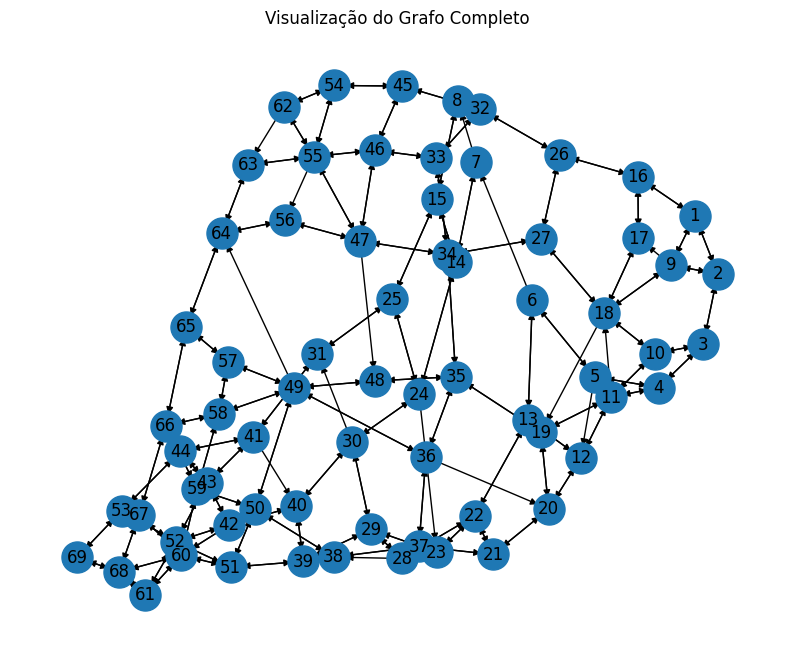

In [4]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import pydot

#  * Exemplo de formato de JSON esperado
#  * {
#   "estatisticas": {
#     "numVertices": 2,
#     "numArestas": 1,
#     "numArcos": 0,
#     "numVerticesRequeridos": 1,
#     "numArestasRequeridas": 1,
#     "numArcosRequeridos": 0,
#     "densidade": 1.0,
#     "componentes": 1,
#     "grauMin": 1,
#     "grauMax": 1,
#     "caminhoMedio": 10.0,
#     "diametro": 10,
#     "intermediacao": [0, 0, 0]
#   },
#   "grafo_dot": "digraph G {\\n  1 [label=\"1\"];\\n  2 [label=\"2\"];\\n  1 -> 2 [dir=both, arrowtail=none, arrowhead=none, label=\"10\"];\\n}"
# }

# Carrega o arquivo JSON
with open('estatisticas.json', 'r') as f:
    dados = json.load(f)

# Exibe as estatísticas
estatisticas = dados['estatisticas']
print("=== Estatísticas do Grafo ===")
for chave, valor in estatisticas.items():
    print(f"{chave}: {valor}")

# Lê a string DOT e cria o grafo com NetworkX
dot_data = dados['grafo_dot']
(pydot_graph,) = pydot.graph_from_dot_data(dot_data)
G = nx.DiGraph(nx.nx_pydot.from_pydot(pydot_graph))

# Desenha o grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.title("Visualização do Grafo Completo")
plt.axis('off')
plt.show()
